# Wind turbine characteristics 

We study breifly about general characteristics of a wind turbine in terms of $C_p$ (power coefficient), $C_T$ (thrust coefficient), annual wind power, and little bit of wind turbine controller.


## Power capture

We know the power available in the airflow (this what is potentially available but not what we can extract) is a function of air density $\rho$, area of rotor swept area $A$, ands mean wind inflow $u$ as follows:

$$P_{air}=\frac{1}{2}\rho A u^3$$

According to the Betz limit the maximum power, we can extract from available power as follows

$$P_{max}=0.59P_{air}$$

The power that each certain type of turbine can extract is represented then as follows:

$$P_{out}=C_pP_{air}$$

where $C_p$ denotes the power coefficient that depend on several factors such as rotational effects of wake, rated capacity, aerodynamic design, and impacts of different mechanical losses (in drive train, denerator).According to Betz limit, the maximum value of $C_p$ is $16/27$. 

## Thrust coefficient

The speed at actuator disc ($U_1$) can be expressed AS the average of speed of upwind flow ($U_0$) and downwind ($U_2$):

$$U_1=\frac{U_0+U_2}{2}$$
We can also define a coefficient $a\in [0,1]$ known as axial induction factor to express $U_1$ as a function of upstream wind as

$$U_1=(1-a)U_0$$

Power extracted from turbine at the actuator disk and thrust are connected to each other as $P=TU_1$. Thrust is defined as

$$T=\frac{1}{2}\rho AC_TU_0^2 $$

where the thrust coefficient is estimated as $C_T=4a(1-a)$. Using power and thrust relation, we have

$$C_p=4a(1-a)^2$$




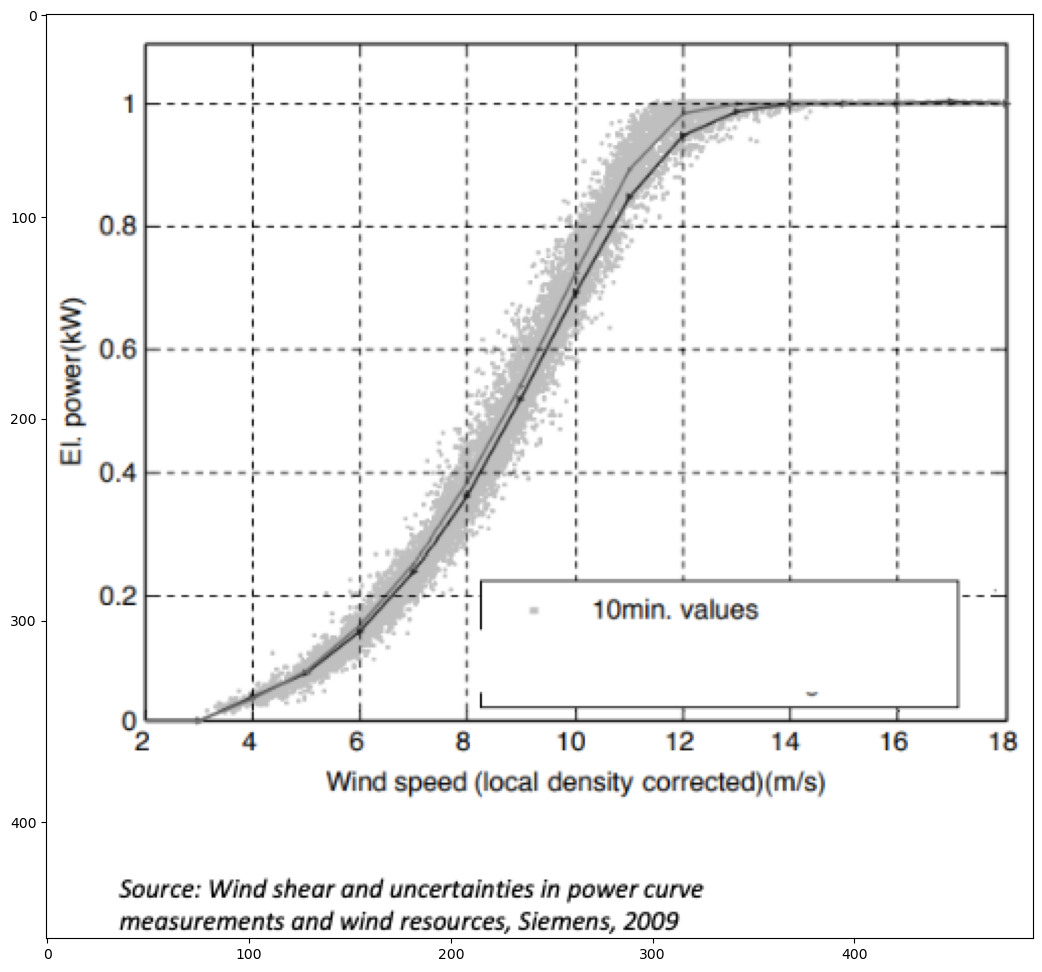

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("PowerCurve.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

# What is a controller

Assume we have a Tesla car and we would like to test it. It should drive 1km a straight road with no obstacle. By knwoing the speed of car, the car get to the point (by knowing the speed we will know how long the car needs to reach to the target point). This is an example of an __open loop__ system since there is no other adjustment based on positioning of car as a function of time. If there is a problem in one of wheel so that the car deviates from straight line, whether it is possible Tesla could end onto the right position if accuracy matters? If there is some problem in the internal system of car so that it drives faster or slower, whether the car reaches to its target location? 

In above example we put speed on car and expect moves for a certain time as shown in following figure

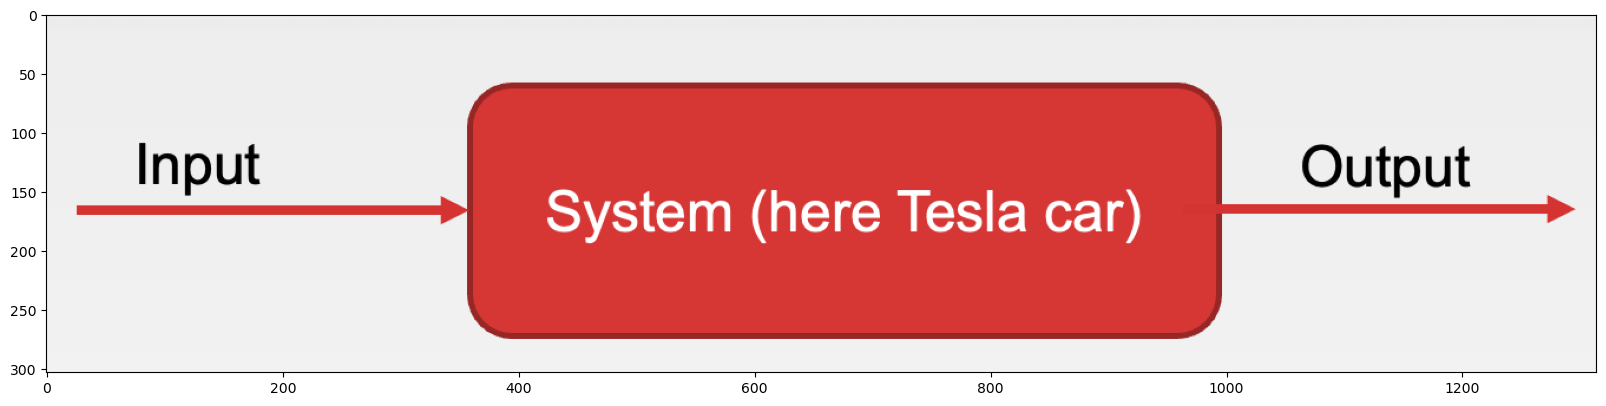

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("OpenLoop.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

To resolve above issue, we can use __feedback control__ in which at different times the location of car is fed back to the car and car apply required adjusments. But we need a __reference__ in order to make such adjustment. Assume we have __observational data__ as reference. In this case the difference between the feedback current location (where you are) and measured one, where you have to be (__the error__) is the one is passed into the system (plant, car in our case). 




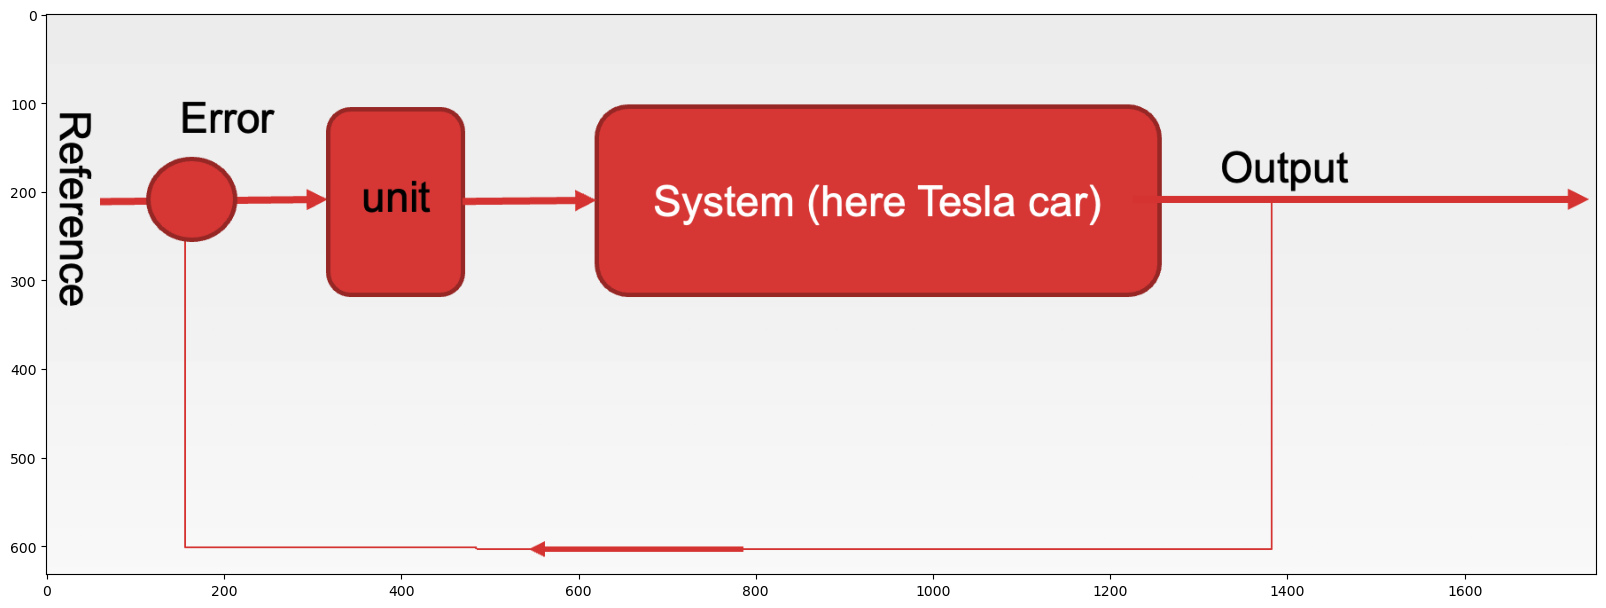

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("FeedbackControl.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

Here, we are going to pass the location difference as input to the car while it accepts speed as input. Therefore, we need to resolve the unit difference here. Ultimate goal is to reduce this error as a function of time. It means the by getting very small error the location of car at the end of journey will be exactly at the target position.


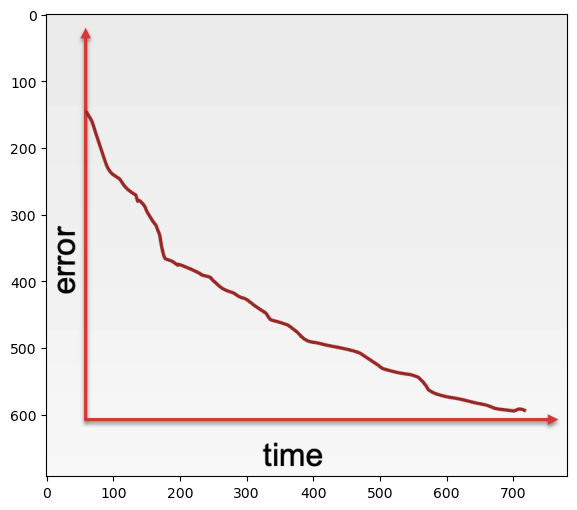

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("ErrorFeedbackControl.PNG")

fig = plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

# A note on control system of a Horizontal Axis Wind Turbine (HAWT)


There are different type of controller in a HAWT such as 

__Yaw controller__

__Standard oerational control systems__ (generator torque, mechanical brakes, pitch control, etc, emergency shut-down, power regulation, etc).

__Floater motions control__


In order to understand how controllers work, it is important to know the standard operational features (rotational speed, blade pitchs, etc) of a HAWT that a controller uses. This leads to understanding better different regions of power curve that controllers rely on. Following figure shows 5 different regions of a power curve.

__Region 1__: The wind speed is low so that it is not efficient for power generator to operate. In this region turbine is not operating (idling).

__Region 2__: There is a correlated increase between generated power and wind. In this region, the rotational speed is controlled by the generator torque controller. This will optimize the rotational speed.

__Region 2.5__: This region as shown in the figure is a transition region in which generator torque controller causes a constant rotor speed.

__Region 3__: This is the region of rated power production and blade pitch is active here to keep the generator torqque constant or maintain any defined constant power strategy.

__Region 4__: Thurin in this region is not operating (idling).






A controller in its simplest form for an input timeseries $x(t)$ and output timeseries $e(t)$ (which is the different/error between the observed and measured signals) is represented as follows


$$e(t)=K_d\frac{dx}{dt}+K_px+K_i\int_0^t x dt.$$


Here $K_p, K_d$, and $K_i$ are the proportional, derivative, and integrate gains, respectively. Note that we need to carefully filter out the input signal for the controller system.




## Control below the rated wind speed (generator torque control)


Assume tip speed of $\gamma$ and in this case, we do not implement any pitch control, rotor speed is variable, and we aim to optimize the generator torque curve and reach a constant tip speed ration. 



## Control above the rated wind speed (generator torque control)


In this case we regulate the generator torque by the use of collective blade pitch in order to achive constant power and constant torque. Assume to denote the rotational speed of generator and the rated power by $\omega$ and $P_o$ respectively. The generator torque, $q_g$, is given (for constant torque) as

$$q_g=\frac{P_o}{\omega_0}$$


where $\omega_0$ is the rated rotational speed of the generator (remember power=torque$\times$ speed). To keep power constant, we use following 

$$q_g=\frac{P_o}{\omega}$$


Above relations states that the generator torque inversely is proportional to rotational speed. Assume the we are going to use a Proportional-Integral (PI) controller for the pitch, $\beta$. We use rotational speed as input to the controller, and pitch angle needs to be controlled and therefore we use the difference of blade pitch difference $\Delta \beta$:

$$\Delta \beta (t)=K_(\omega-\omega_0)+K_i\int_0^t (\omega - \omega_0)dt$$



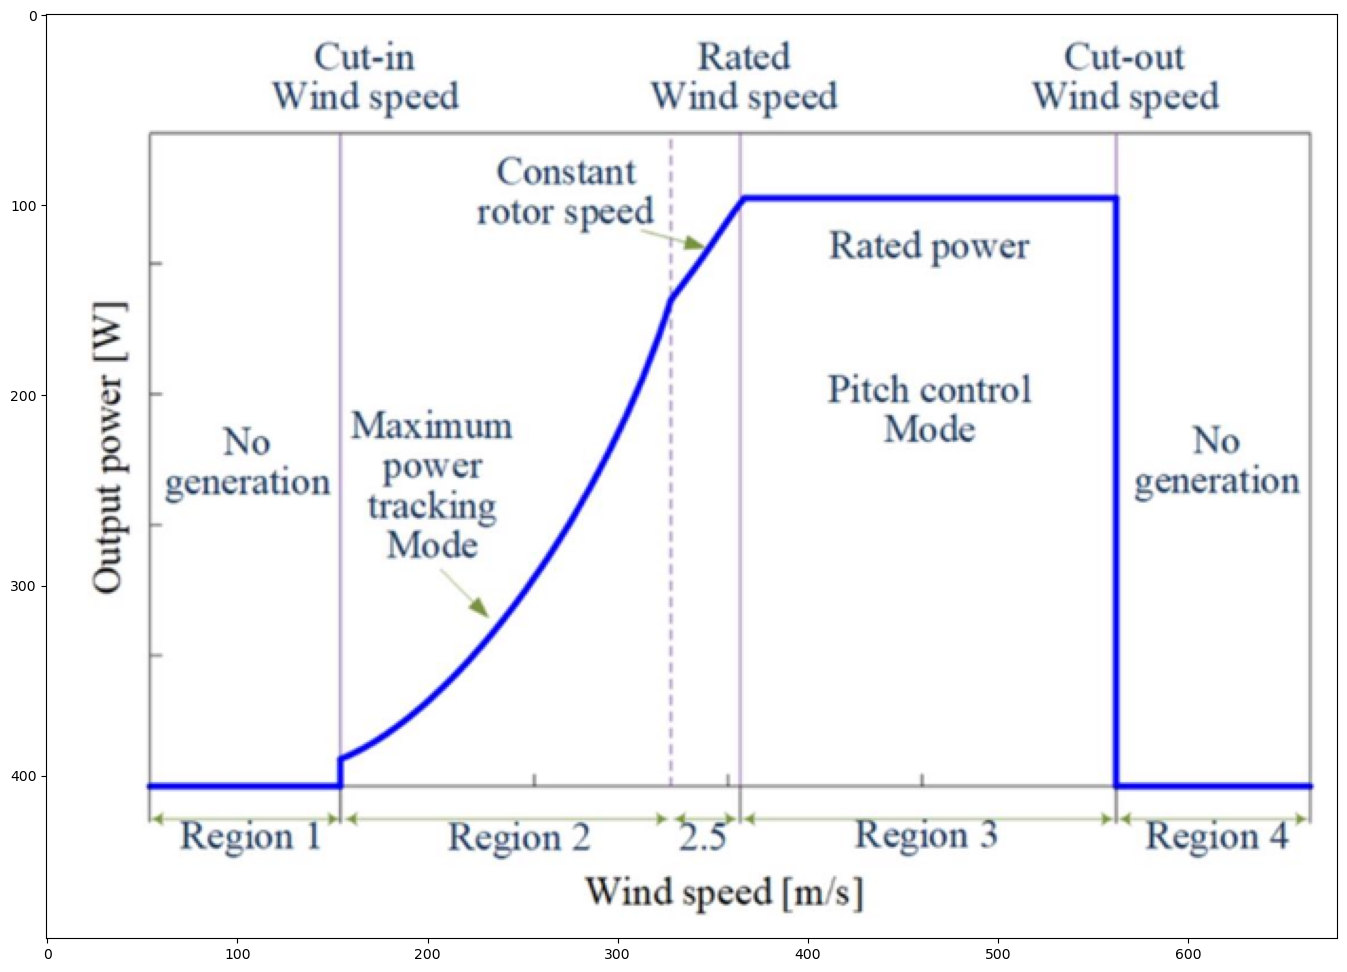

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("OperationalRegions.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()